# Analysis of alignment statistics Dataset2: Infected

Cynthia Soto <br>
Fecha: September 22nd, 2020 <br>
Datatype representation: expression levels CDS (gene_name) <br>
Data quantify with HTSeq (alignments done with STAR SA) <br>

***Case:*** <br>
Dataset2: Infected - Arabidopsis (Col-0)<br>
Dataset composed by 12 transcriptomes of A.thaliana infected by ascomycete (fungi)<br>
Datatype representation: tvs file 
<br>
Statistics generated by STAR alignment were retrieved from the alignment output files and stored into a unique  file called ~/athal1_stats/my_statistics_STAR_alignment.txt for further analysis

In [12]:
# Libraries required
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
try:
    # Change the current working Directory    
    os.chdir("/home/cyntsc/Proyectos/athal2_stats/")
    print("Directory changed:", os.getcwd() )
except OSError:
    print("Can't change the Current Working Directory")    

Directory changed: /home/cyntsc/Proyectos/athal2_stats


In [14]:
df=pd.read_csv("my_statistics_STAR_alignment2.txt", sep='\s+', header=None)
df.columns = ["sample","stat", "value"] 
df['value'] = df['value'].str.rstrip('%').astype('float') #/ 100.0
df.head(12)

,sample,stat,value
0,SRR3383696,unique_mapped_reads,98.20
1,SRR3383697,unique_mapped_reads,98.14
2,SRR3383779,unique_mapped_reads,93.55
3,SRR3383780,unique_mapped_reads,95.20
4,SRR10586397,unique_mapped_reads,89.07
5,SRR10586399,unique_mapped_reads,88.69
6,SRR364389,unique_mapped_reads,87.17
7,SRR364390,unique_mapped_reads,87.29
8,SRR364398,unique_mapped_reads,80.25
9,SRR364399,unique_mapped_reads,80.25


In [51]:
sample_names =  df['sample'].unique()
print(sample_names)
stat_names= df['stat'].unique()
print(stat_names)
# Rename to give more sense
sample_names = ['Bc12','Bc12','Bc18','Bc18','Bc24','Bc24','Ch22','Ch22','Ch40','Ch40','Ss30','Ss30']
print(sample_names)

['SRR3383696' 'SRR3383697' 'SRR3383779' 'SRR3383780' 'SRR10586397'
 'SRR10586399' 'SRR364389' 'SRR364390' 'SRR364398' 'SRR364399'
 'SRR6283147' 'SRR6283148']
['unique_mapped_reads' 'average_mapped_length' 'number_splices'
 'mismatch_rate_per_base' 'deletion_average_length'
 'reads_unmapped_too_short']
['Bc12', 'Bc12', 'Bc18', 'Bc18', 'Bc24', 'Bc24', 'Ch22', 'Ch22', 'Ch40', 'Ch40', 'Ss30', 'Ss30']


In [52]:
is_unique_mapped =  df[df['stat']=="unique_mapped_reads"]
#print(is_unique_mapped)
f_mapped = is_unique_mapped['value']
#print(f_mapped)
#type(f_mapped)
f_mapped_no_index = f_mapped.to_string(index=False)
print(f_mapped_no_index)

is_deletion =  df[df['stat']=="reads_unmapped_too_short"]
f_deletion = is_deletion['value']
#print(f_deletion)
f_deletion_no_index = f_deletion.to_string(index=False)
print(f_deletion_no_index)

 98.20
 98.14
 93.55
 95.20
 89.07
 88.69
 87.17
 87.29
 80.25
 80.25
 32.35
 29.50
  0.24
  0.38
  4.98
  3.32
  9.74
 10.14
 11.17
 11.06
 16.39
 16.41
 66.31
 69.21


In [53]:
# porcentajes de alineamientos unicos
f_mapped.sort_values()
# porcentajes de reads_unmapped_too_short
f_deletion.sort_values()

60     0.24
61     0.38
63     3.32
62     4.98
64     9.74
65    10.14
67    11.06
66    11.17
68    16.39
69    16.41
70    66.31
71    69.21
Name: value, dtype: float64

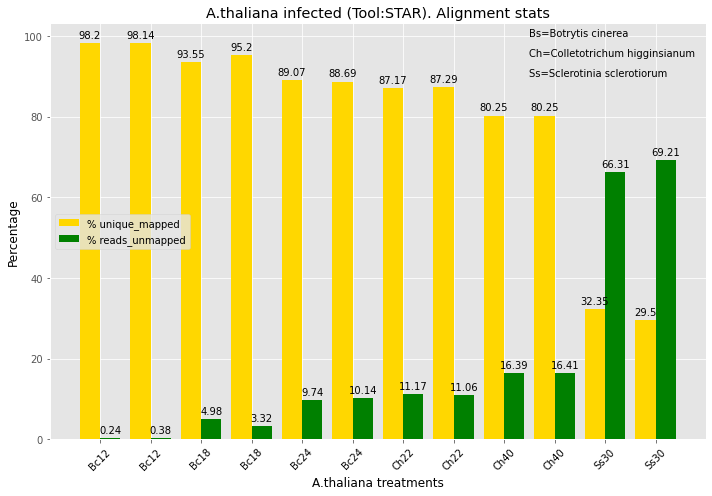

In [72]:
x = np.arange(len(sample_names))  # the label locations
width = 0.40  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
plt.style.use('ggplot')

rects1 = ax.bar(x - width/2, f_mapped, width, label='% unique_mapped', color='gold')
rects2 = ax.bar(x + width/2, f_deletion, width, label='% reads_unmapped', color='green')
# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('Percentage',color='black')
ax.set_xlabel('A.thaliana treatments',color='black')
ax.set_title('A.thaliana infected (Tool:STAR). Alignment stats')
ax.set_xticks(x)
ax.set_xticklabels(sample_names)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.legend(loc="center left")
plt.xticks(rotation=45, color='black')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()

str = 'Bs=Botrytis cinerea';
ax.annotate(str, xy=(8.5, 100))
str = 'Ch=Colletotrichum higginsianum';
ax.annotate(str, xy=(8.5, 95))
str = 'Ss=Sclerotinia sclerotiorum';
ax.annotate(str, xy=(8.5, 90))
 
#plt.savefig("../athal2_stats/alignment2_STAR_percentages.png")

plt.show()